## An Inception module in an Inception neural Network for deep learning

در این مثال ابتدا یک عکس را فراخوانی می کنیم و سپس با پردازش روی آن که 2 مرحله می باشد آماده برای تاثیر بر یک بلوک  اینسپشن می کنیم . کد بلوک اینسپشن نوشته شده است و وقتی که این بلوک را روی عکس اثر می دهیم به یک عکس با همان ابعاد 224 در 224 منتها اکنون با 160لایه می رسیم یعنی این بلوک فیچر اکسترکشن کرده است. اگر بخواهیم که لرنینگ را انجام دهیم باید که یک لایه دنس اضافه کنیم

In [27]:
from tensorflow.keras.preprocessing import image#وارد کردن عکس به کد
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input


In [28]:
#تصویر را از گوگل درایو فراخوانی می کنیم. اینکار را می توان با آپ لود کردن عکس از سمت راست هم انجام داد
!gdown --id 1CoRZlZb5g1szxkAuy3WAk9hPkbIXtVoo/view?usp=drive_link

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1CoRZlZb5g1szxkAuy3WAk9hPkbIXtVoo/view?usp=drive_link

but Gdown can't. Please check connections and permissions.


<class 'PIL.Image.Image'>


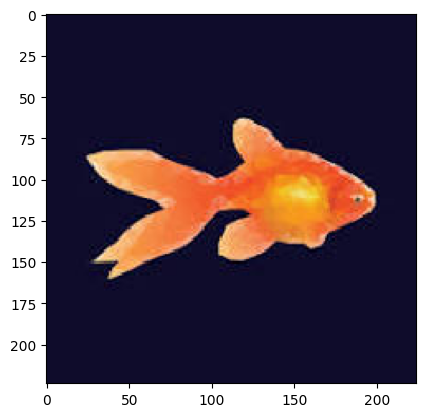

tensor of image_test : [[[15. 12. 43.]
  [15. 12. 43.]
  [15. 12. 43.]
  ...
  [15. 12. 43.]
  [15. 12. 43.]
  [15. 12. 43.]]

 [[15. 12. 43.]
  [15. 12. 43.]
  [15. 12. 43.]
  ...
  [15. 12. 43.]
  [15. 12. 43.]
  [15. 12. 43.]]

 [[15. 12. 43.]
  [15. 12. 43.]
  [15. 12. 43.]
  ...
  [15. 12. 43.]
  [15. 12. 43.]
  [15. 12. 43.]]

 ...

 [[15. 12. 43.]
  [15. 12. 43.]
  [15. 12. 43.]
  ...
  [15. 12. 43.]
  [15. 12. 43.]
  [15. 12. 43.]]

 [[15. 12. 43.]
  [15. 12. 43.]
  [15. 12. 43.]
  ...
  [15. 12. 43.]
  [15. 12. 43.]
  [15. 12. 43.]]

 [[15. 12. 43.]
  [15. 12. 43.]
  [15. 12. 43.]
  ...
  [15. 12. 43.]
  [15. 12. 43.]
  [15. 12. 43.]]]


In [29]:
img_path="/content/gold fish.jpg"
#فراخوانی عکس از کولب و تغییر اندازه آن به 244در244 با سه کانال
image_test=image.load_img(img_path,target_size=(224,224,3))
print(type(image_test))
#تبدیل عکس به صورت آرایه
image_test_to_tensor=image.img_to_array(image_test)

plt.imshow(image_test)#نمایش عکس

plt.show()
print("tensor of image_test :" ,image_test_to_tensor)#نمایش آرایه های عکس


In [30]:
#برای وارد کردن عکس به صورت بچ بچ نیاز است تا ما یک کانال دیگر به ابتدای عکس اضافه کنیم
#با کد زیر و انتخاب اکسس صفر تعداد ابعاد را به ابتدای عکس اضافه می کنیم
image_for_Bath_size=np.expand_dims(image_test_to_tensor, axis=0)
print("shape of image_test_to_tensor",image_test_to_tensor.shape)
print('shape of image_for_Bath_size is :',image_for_Bath_size.shape)

shape of image_test_to_tensor (224, 224, 3)
shape of image_for_Bath_size is : (1, 224, 224, 3)


In [31]:

import tensorflow as tf

def inception_module(input_layer, filters=(64, 128, 32, 32)):
    path1 = tf.keras.layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(input_layer)

    path2 = tf.keras.layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(input_layer)
    path2 = tf.keras.layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)

    path3 = tf.keras.layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(input_layer)
    path3 = tf.keras.layers.Conv2D(filters[3], (5, 5), padding='same', activation='relu')(path3)

    path4 = tf.keras.layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_layer)
    path4 = tf.keras.layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(path4)

    return tf.keras.layers.Concatenate()([path1, path2, path3, path4])

# Create a simple example usage for image recognition
input_shape = (224, 224, 3)
input_layer = tf.keras.layers.Input(shape=input_shape)
inception_output = inception_module(input_layer)

model = tf.keras.Model(inputs=input_layer, outputs=inception_output)
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_19 (Conv2D)          (None, 224, 224, 128)        512       ['input_3[0][0]']             
                                                                                                  
 conv2d_21 (Conv2D)          (None, 224, 224, 32)         128       ['input_3[0][0]']             
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 224, 224, 3)          0         ['input_3[0][0]']             
 g2D)                                                                                       

In [32]:
#اکنون بلوک اینشپشن را بر عکس 224 در 224 یا 3لایه اپر می دهیم
model_on_image_for_Bath_size=model(image_for_Bath_size)
image_fiture=model_on_image_for_Bath_size
print("shape of image_fiture",image_fiture.shape)
print("shape of image_test_to_tensor",image_test_to_tensor.shape)
print('shape of image_for_Bath_size is :',image_for_Bath_size.shape)
#همانگونه که از پرینت های بالا مشخص است حاصل یک عکس 224 در 224 با 160لایه می باشد یعنی این بلوک
#توانسته که یک عکس با160لایه تولید کند و بر اساس آن در مرحله بعد اقدام به آموزش کند
# اصطلاحا این بلوک فیچر اکسترکشن کرده است
#یعنی تعداد فیچر را که224*224*3 بوده است را به224*224*160 تا افزایش داده و در ادامه مدل روی این تعداد
#فیچر اقدام به آم.زش می کند
pred_image_inception_module=model.predict(image_for_Bath_size)
print('shape of pred_image_inception_module is :',pred_image_inception_module.shape)
print("Number of featur of ",224*224*3,"rise of ",224*224*160)

shape of image_fiture (1, 224, 224, 160)
shape of image_test_to_tensor (224, 224, 3)
shape of image_for_Bath_size is : (1, 224, 224, 3)
1/1 [==============================] - 0s 220ms/step
shape of pred_image_inception_module is : (1, 224, 224, 160)
Number of featur of  150528 rise of  8028160


در زیر روند ورود عکس را به داخل شبکه می بینیم

In [33]:
print("shape of input image is :",image_for_Bath_size.shape)

path1 = tf.keras.layers.Conv2D(64, (1, 1), padding='same', activation='relu')(image_for_Bath_size)
print("shape of path1 is :",path1.shape)


path2 = tf.keras.layers.Conv2D(128, (1, 1), padding='same', activation='relu')(image_for_Bath_size)
print("shape of path2 in order 1 is :",path2.shape)
#در اینجا چون پدینگ را سیم گرفته ایم پس  اندازه عکس همان 224در 224 می ماند و در آخر که کانکت م کنیم
#یعنی به  هم می چسبانیم باز هم عکس224 در 224 است
path2 = tf.keras.layers.Conv2D(32, (3, 3), padding='same',activation='relu')(path2)
print("shape of path2 in final order is :",path2.shape)


path3 = tf.keras.layers.Conv2D(32, (1, 1), padding='same', activation='relu')(image_for_Bath_size)
path3 = tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu')(path3)

path4 = tf.keras.layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(image_for_Bath_size)
path4 = tf.keras.layers.Conv2D(32, (1, 1), padding='same', activation='relu')(path4)

concated_image= tf.keras.layers.Concatenate()([path1, path2, path3, path4])
print("shape of concated_image is :",concated_image.shape)

shape of input image is : (1, 224, 224, 3)
shape of path1 is : (1, 224, 224, 64)
shape of path2 in order 1 is : (1, 224, 224, 128)
shape of path2 in final order is : (1, 224, 224, 32)
shape of concated_image is : (1, 224, 224, 160)


#اکنون در زیر اتفاقاتی برای یک عکس پس از فیلتر گداشتن روی آن اتفاق می افتد و 64 عکس جدید حاصل می شود دیده می شود

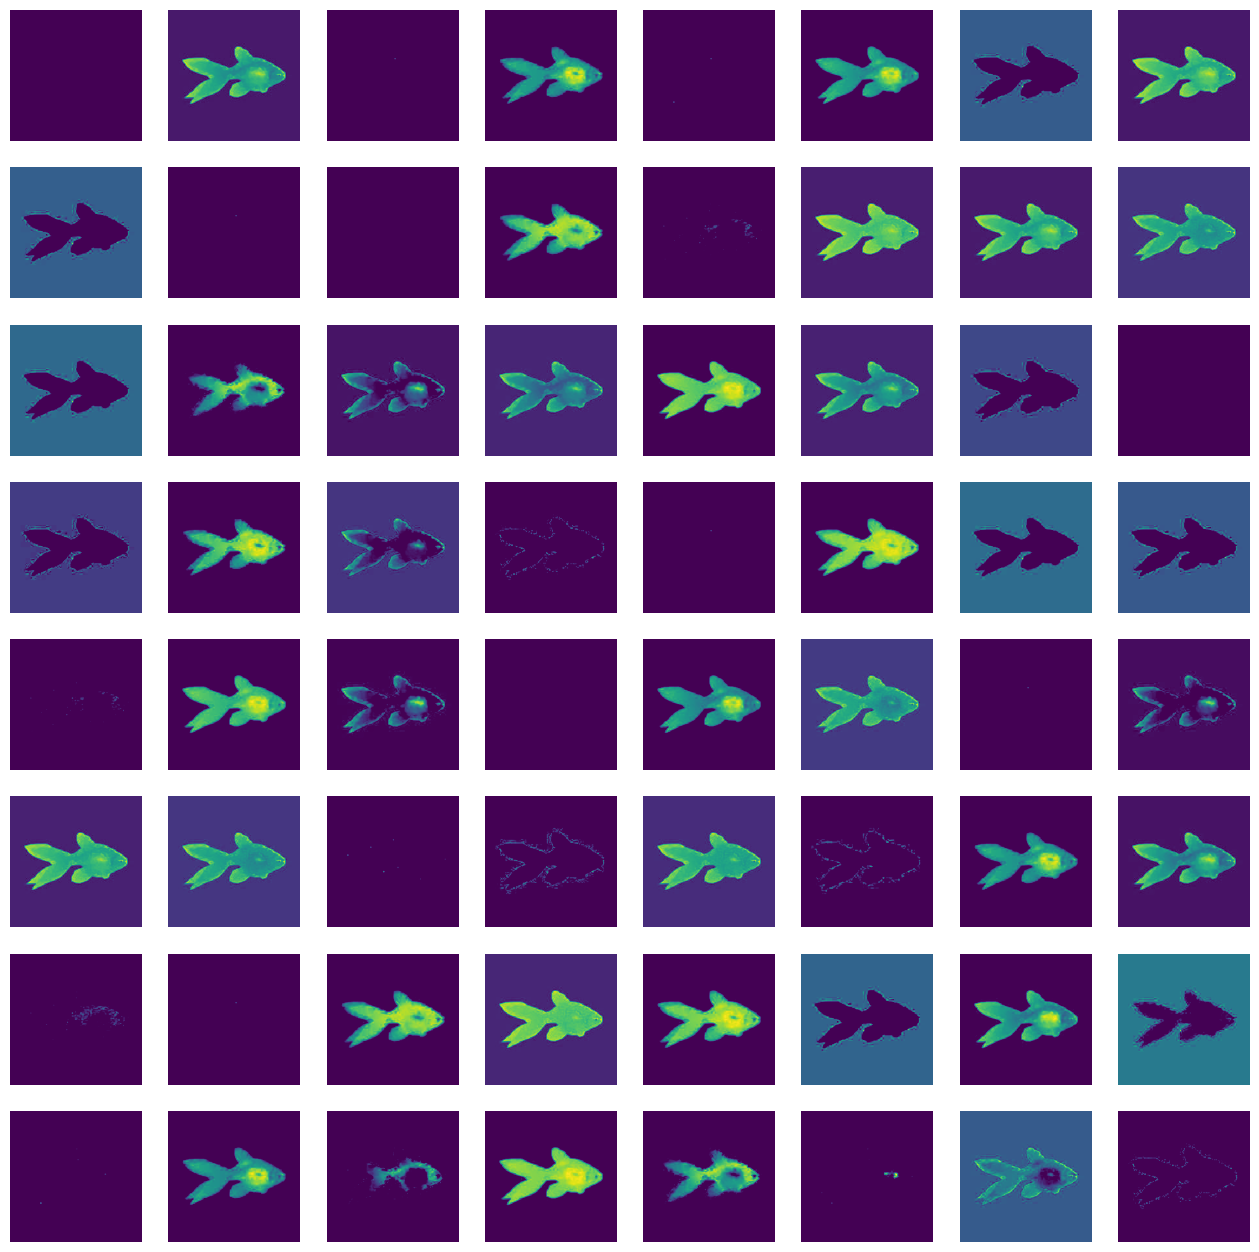

In [34]:

import numpy as np
import matplotlib.pyplot as plt

# Generate a random image with shape (1, 224, 224, 64)
image = path1

# Display each slice of the image
fig, axes = plt.subplots(8, 8, figsize=(16, 16))
for i in range(64):
    row = i // 8
    col = i % 8
    axes[row, col].imshow(image[0, :, :, i])
    axes[row, col].axis("off")

plt.show()


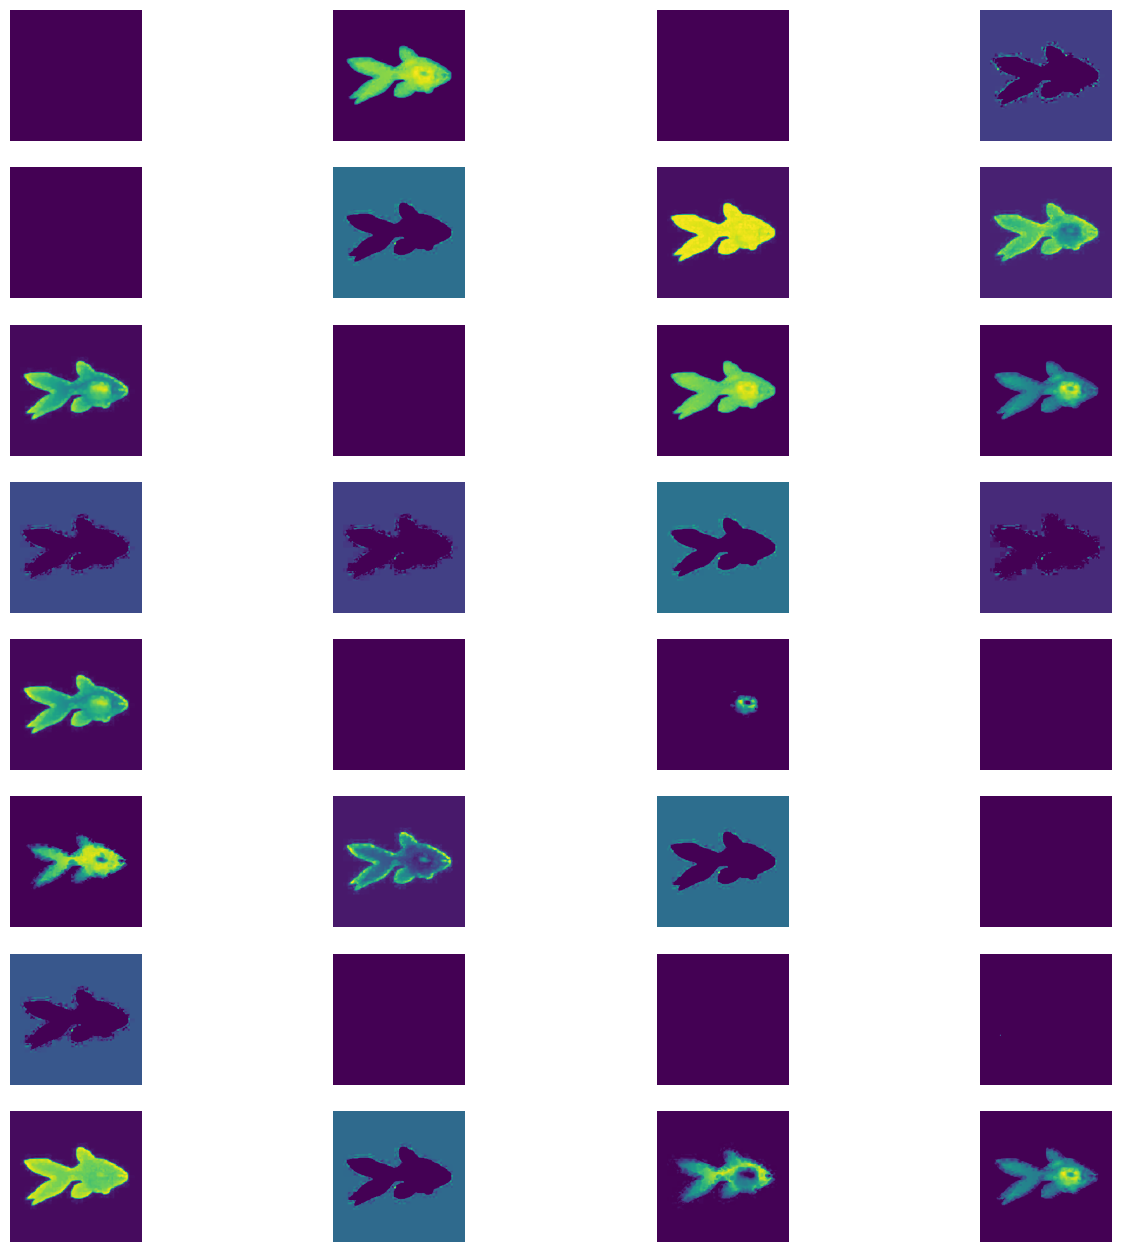

In [35]:
#تصویر بعد از ورود به لایه چهارم
import numpy as np
import matplotlib.pyplot as plt

# Generate
image = path4

# Display each slice of the image
fig, axes = plt.subplots(8, 4, figsize=(16, 16))
for i in range(32):
    row = i // 4
    col = i % 4
    axes[row, col].imshow(image[0, :, :, i])
    axes[row, col].axis("off")

plt.show()


# دو تکه کد زیر نیز بیانگر یک بلوک اینسپشن می باشن

In [36]:

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Concatenate

def InceptionModule(x, filters):
    # 1x1 Convolution
    conv1x1 = Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)

    # 3x3 Convolution
    conv3x3 = Conv2D(filters[1], (3, 3), padding='same', activation='relu')(x)

    # 5x5 Convolution
    conv5x5 = Conv2D(filters[2], (5, 5), padding='same', activation='relu')(x)

    # Max Pooling
    maxpool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)

    # Concatenate the outputs
    inception_module = Concatenate()([conv1x1, conv3x3, conv5x5, maxpool])

    return inception_module

# Example usage
input_tensor = tf.keras.Input(shape=(224, 224, 3))
inception_output = InceptionModule(input_tensor, filters=[64, 128, 32])


In [37]:

import tensorflow as tf

def inception_module(x, filters):
    conv1x1 = tf.keras.layers.Conv2D(filters[0], (1,1), padding='same', activation='relu')(x)

    conv3x3 = tf.keras.layers.Conv2D(filters[1], (1,1), padding='same', activation='relu')(x)
    conv3x3 = tf.keras.layers.Conv2D(filters[2], (3,3), padding='same', activation='relu')(conv3x3)

    conv5x5 = tf.keras.layers.Conv2D(filters[3], (1,1), padding='same', activation='relu')(x)
    conv5x5 = tf.keras.layers.Conv2D(filters[4], (5,5), padding='same', activation='relu')(conv5x5)

    pool = tf.keras.layers.MaxPooling2D((3,3), strides=(1,1), padding='same')(x)
    pool = tf.keras.layers.Conv2D(filters[5], (1,1), padding='same', activation='relu')(pool)

    return tf.keras.layers.concatenate([conv1x1, conv3x3, conv5x5, pool], axis=-1)

# Example usage of the Inception module
input_layer = tf.keras.layers.Input(shape=(28, 28, 3))
inception_output = inception_module(input_layer, filters=[16, 64, 128, 32, 64, 32])

model = tf.keras.models.Model(inputs=input_layer, outputs=inception_output)
model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 28, 28, 3)]          0         []                            
                                                                                                  
 conv2d_34 (Conv2D)          (None, 28, 28, 64)           256       ['input_5[0][0]']             
                                                                                                  
 conv2d_36 (Conv2D)          (None, 28, 28, 32)           128       ['input_5[0][0]']             
                                                                                                  
 max_pooling2d_6 (MaxPoolin  (None, 28, 28, 3)            0         ['input_5[0][0]']             
 g2D)                                                                                       